<a href="https://colab.research.google.com/github/VictorFu0717/AI/blob/main/gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 利用另外一個神經網路當作loss function回頭調整
# 反向神經（創作Generator） + 正向神經（鑑賞Discriminator:輸出0/1）

# 訓練
# 1.訓練Discriminator
#   1:真:mnist  0:假:Generator
# 2.訓練Generator(Discriminator:固定參數)
#   out:1

In [ ]:
from tensorflow.keras.datasets.mnist import load_data
(x_train, y_train), (x_test, y_test) = load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
layers = [
    Dense(64, activation="relu", input_dim=784),
    Dropout(0.25),
    Dense(1, activation="sigmoid")
]
dis = Sequential(layers)
dis.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 50,305
Trainable params: 50,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.layers import BatchNormalization
#模擬靈感，再慢慢擴大
layers = [
    Dense(256, activation="relu", input_dim=100),
    BatchNormalization(),
    Dense(512, activation="relu"),
    BatchNormalization(),
    Dense(784, activation="tanh")
]
#tanh:類似sigmoid,但輸出是1 ~ -1
gen = Sequential(layers)
gen.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               25856     
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_3 (Dense)             (None, 512)               131584    
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 784)               402192    
                                                                 
Total params: 562,704
Trainable params: 561,168
Non-tr

In [ ]:
from tensorflow.keras.losses import BinaryCrossentropy
#compile確認loss
dis.compile(loss=BinaryCrossentropy(),
            optimizer="adam")

In [ ]:
from tensorflow.keras.models import Model
dis.trainable = False
out = dis(gen.output)
gan = Model(gen.input, out)
gan.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2_input (InputLayer)  [(None, 100)]             0         
                                                                 
 dense_2 (Dense)             (None, 256)               25856     
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_3 (Dense)             (None, 512)               131584    
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 784)               402192

In [ ]:
gan.compile(loss=BinaryCrossentropy(),
            optimizer="adam")

In [ ]:
x_train_norm = (x_train.reshape(60000, 784) - 127.5) / 127.5
#變 -1 ~ 1

In [ ]:
# batch=20
import numpy as np
valid = np.ones((20, )) 
fake = np.zeros((20, ))

In [ ]:
# 最終會進入NASH均衡，不會過擬合
for i in range(100000):
    # dis
    idx = np.random.randint(0, 60000, size=20)
    img = x_train_norm[idx]
    r1 = dis.train_on_batch(img, valid)
    #np.random.normal常態分佈：-1~1
    rand = np.random.normal(size=(20, 100))
    imgf = gen.predict(rand)
    r2 = dis.train_on_batch(imgf, fake)
    if i % 100 == 0:
        print("dis loss:", (r1 + r2) / 2)
    # gen
    rand = np.random.normal(size=(20, 100))
    r3 = gan.train_on_batch(rand, valid)
    #希望Generator最後往1靠攏
    if i % 100 == 0:
        print("gen loss:", r3)

dis loss: 0.5906134992837906
gen loss: 0.5705960988998413
dis loss: 0.1218931000912562
gen loss: 1.2952829599380493
dis loss: 0.04870376503095031
gen loss: 3.670809268951416
dis loss: 0.06510181352496147
gen loss: 4.2268595695495605
dis loss: 0.10992829874157906
gen loss: 3.122138738632202
dis loss: 0.09178859740495682
gen loss: 4.190110206604004
dis loss: 0.2143797129392624
gen loss: 4.120495796203613
dis loss: 0.1906973123550415
gen loss: 3.467543840408325
dis loss: 0.26996858417987823
gen loss: 3.968109130859375
dis loss: 0.300376832485199
gen loss: 2.6096138954162598
dis loss: 0.3453976511955261
gen loss: 2.400423526763916
dis loss: 0.36070507764816284
gen loss: 3.5953211784362793
dis loss: 0.3697751760482788
gen loss: 1.9534950256347656
dis loss: 0.3648844063282013
gen loss: 2.5393104553222656
dis loss: 0.39069461822509766
gen loss: 2.3185465335845947
dis loss: 0.5133068859577179
gen loss: 1.7408382892608643
dis loss: 0.38620467483997345
gen loss: 3.0559334754943848
dis loss: 0.30

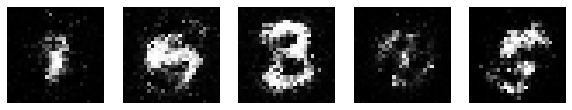

In [ ]:
import matplotlib.pyplot as plt
rand = np.random.normal(size=(5, 100))
ans = (gen.predict(rand).reshape(5, 28, 28) + 1) / 2
# 預測結果讓輸出轉換成0~1

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.axis("off")
    plt.imshow(ans[i], cmap="gray")